In [1]:
# Like & Upvote if you like it.

# Credit Card Fraud Detection
# General Neural Network
# UnderSample Dataset
# OverSample Dataset/SMOTE
# Confusion Metrics
# Data Visualiation

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/creditcardfraud/creditcard.csv


# Load & Explore

In [3]:
df_cc = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [4]:
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df_cc.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df_cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df_cc.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [8]:
df_cc.shape

(284807, 31)

In [9]:
df_cc.Amount

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

# Scaling Data

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_cc["normalized_amount"] = sc.fit_transform(df_cc["Amount"].values.reshape(-1, 1))
df_cc.drop(columns=["Amount"], inplace=True)

In [11]:
df_cc.normalized_amount.head(10)

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: normalized_amount, dtype: float64

In [12]:
# Drop time column
df_cc.drop(columns=["Time"], inplace=True)

In [13]:
df_cc.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [14]:
X = df_cc.iloc[:, df_cc.columns != "Class"]
y = df_cc.iloc[:, df_cc.columns == "Class"]

In [15]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [16]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


# Basic Neural Network

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)

(170884, 29)
(113923, 29)


In [19]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
X_train

array([[ 1.41259991e+00, -1.12648053e+00,  7.69823445e-01, ...,
         5.10523722e-02,  2.87660518e-02, -1.88748127e-01],
       [-1.95457426e-01,  1.20343665e+00,  9.30156833e-02, ...,
         4.35603879e-01,  2.34195684e-01, -3.33398885e-01],
       [ 1.48983838e+00, -1.87834402e+00, -8.18912342e-01, ...,
        -1.38744057e-02,  1.00683450e-02,  9.06167758e-01],
       ...,
       [ 1.51260229e+00, -9.49435315e-01, -2.19061626e-01, ...,
        -1.41537086e-03,  3.66494418e-03, -2.13696185e-01],
       [ 1.79886333e+00, -1.69979073e+00, -1.42182189e-01, ...,
        -3.36155803e-02, -3.24705125e-02,  3.31682753e-01],
       [-5.89399721e-01,  7.47828393e-01,  1.78478144e+00, ...,
         8.65917860e-02,  1.18083774e-01, -2.89299995e-01]])

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


Using TensorFlow backend.


In [22]:
X.shape

(284807, 29)

In [23]:
clf = Sequential([
    Dense(activation="relu", units=16, input_dim=29)
    ,Dense(activation="relu", units=24)
    ,Dropout(0.5)
    ,Dense(activation="relu", units=20)
    ,Dense(activation="relu", units=24)
    ,Dense(activation="sigmoid", units=1)
])

In [24]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [25]:
clf.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
clf.fit(X_train, y_train, batch_size=15, nb_epoch=5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/5
170884/170884 [==============================] - 27s 158us/step - loss: 0.0101 - accuracy: 0.9979
Epoch 2/5
170884/170884 [==============================] - 26s 154us/step - loss: 0.0040 - accuracy: 0.9993
Epoch 3/5
170884/170884 [==============================] - 28s 164us/step - loss: 0.0040 - accuracy: 0.9992
Epoch 4/5
170884/170884 [==============================] - 26s 152us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
170884/170884 [==============================] - 26s 151us/step - loss: 0.0033 - accuracy: 0.9994


In [26]:
score = clf.evaluate(X_test, y_test)

113923/113923 [==============================] - 3s 29us/step


In [27]:
print(score)

[0.004713199325703165, 0.9993240833282471]


In [28]:
y_predict = clf.predict(X_test)
y_test = pd.DataFrame(y_test)

In [29]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict.round())
cm

array([[113711,     13],
       [    64,    135]])

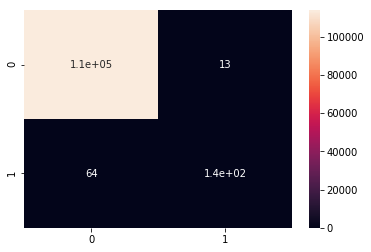

In [30]:
sns.heatmap(cm, annot=True)

In [31]:
# When we are dealing with critical cases like fraud, medical and other sensitive information. We have to 
# minimise our false Negative. It mean in our case it can be seen that 39 frauds are there which we said
# its not but in actual they are. So 39 times people can fraud with us, which is a very bad thing.
# So our main target would be reducing it. 

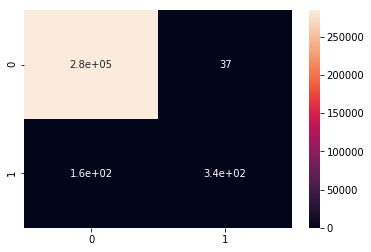

In [32]:
# Plot confusion matrix for entire database
y_predict_all = clf.predict(X)
y_expected = pd.DataFrame(y)
cm_all = confusion_matrix(y_expected, y_predict_all.round())
sns.heatmap(cm_all, annot=True)

In [33]:
# So for complete dataset, according to our model 94 times user can make fraud. So we have to improve our model
# to reduce the possibilty of fraud

# Random Forest

In [34]:
# before modell tuning, lets compare or model with random forst

In [35]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=0)

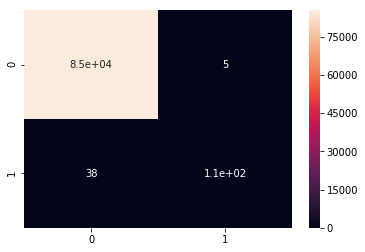

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_rf, y_train_rf.values.ravel())
y_pred_rf = rf.predict(X_test_rf)
y_test_rf = pd.DataFrame(y_test_rf)
cm_rf = confusion_matrix(y_test_rf, y_pred_rf.round())
sns.heatmap(cm_rf, annot=True)

# Undersampling

In [37]:
df_cc.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

We can see in total dataset we have only 492 fraudlent records, which makes our dataset imbalanced or biased. 99% records are real transaction. Only 1% is fraud. So our data is not balanced. It may result in a model which is biased toward real transaction scenario. So we will apply undersampling and oversampling technique to overcome this conition.

In [38]:
fraud_indices = np.array(df_cc[df_cc.Class == 1].index) # All fraud indices

In [39]:
len(fraud_indices) # total fraudlent records

492

In [40]:
#normal indices
normal_indices = np.array(df_cc[df_cc.Class == 0].index)
len(normal_indices)

284315

In [41]:
# Choose random normal rows equal to fraud_indices. So that we can have equal data to train our model.
random_normal_indices = np.random.choice(normal_indices, len(fraud_indices), replace=False)
random_normal_indices = np.array(random_normal_indices)

In [42]:
len(random_normal_indices) # So we selected random normal indices equals to the number of total fraud rows.

492

In [43]:
undersample_indices = np.concatenate([fraud_indices, random_normal_indices])
len(undersample_indices)

984

In [44]:
# So now we have total 984 records with 492 - Fraud case and 492 real transaction case
# lets create our dataset with these indices
undersample_df = df_cc.iloc[undersample_indices, :]

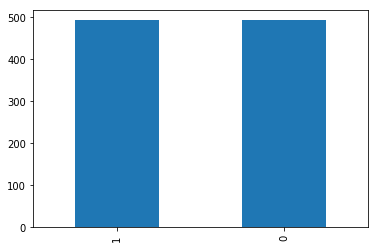

In [45]:
undersample_df.Class.value_counts().plot(kind="bar") # So now our new undersampled dataset is balanced
# Which is a good thing. So lets check whether it predict data in proper way or not?

In [46]:
X_under = undersample_df.iloc[:, undersample_df.columns != 'Class']
y_under = undersample_df.iloc[:, undersample_df.columns == 'Class']

In [47]:
y_under.head()

,Class
541,1
623,1
4920,1
6108,1
6329,1


In [48]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

In [49]:
X_train_us = np.array(X_train_us)
X_test_us = np.array(X_test_us)
y_train_us = np.array(y_train_us)
y_test_us = np.array(y_test_us)

In [50]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [51]:
clf.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
clf.fit(X_train_us, y_train_us, batch_size=15, nb_epoch=5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/5
688/688 [==============================] - 0s 559us/step - loss: 0.5221 - accuracy: 0.8866
Epoch 2/5
688/688 [==============================] - 0s 163us/step - loss: 0.2048 - accuracy: 0.9259
Epoch 3/5
688/688 [==============================] - 0s 165us/step - loss: 0.1771 - accuracy: 0.9375
Epoch 4/5
688/688 [==============================] - 0s 161us/step - loss: 0.1542 - accuracy: 0.9404
Epoch 5/5
688/688 [==============================] - 0s 151us/step - loss: 0.1259 - accuracy: 0.9448


In [52]:
y_pred_us = clf.predict(X_test_us)

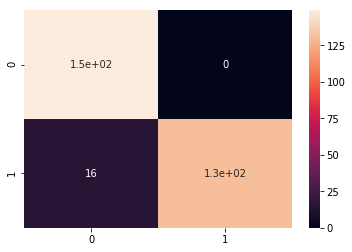

In [53]:
cm_us = confusion_matrix(y_test_us, y_pred_us.round() )
sns.heatmap(cm_us, annot=True)
# Wow we literally reduced the number of false negative. But lets check for whole dataset.

In [54]:
y.shape

(284807, 1)

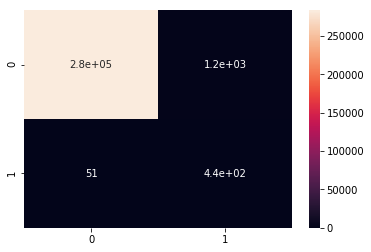

In [55]:
y_pred = clf.predict(X)
y_expected = pd.DataFrame(y)

cm_us = confusion_matrix(y_expected, y_pred.round() )
sns.heatmap(cm_us, annot=True)
# So we have better result than previous. Lets try to improve it more.

# Oversampling /SMOTE

SMOTE is the technique for oversampling, where we equalize data by repeating it. We will use SMOTE method for it.

# Install SMOTE

In [56]:
# uncomment the below line to install library to use SMOTE.
# !pip install -U imbalanced-learn

In [57]:
X.shape

(284807, 29)

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
# Generating OVERSAMPLE data
X_oversample, y_oversample = SMOTE().fit_sample(X, y.values.ravel())

In [60]:
# Converting array into dataframe
X_oversample = pd.DataFrame(X_oversample)
y_oversample = pd.DataFrame(y_oversample)

In [61]:
X_oversample.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [62]:
print(X_oversample.shape)
print(y_oversample.shape)
# Now we can see we have much more data to train because of oversampling

(568630, 29)
(568630, 1)


In [63]:
# Get train test data
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_oversample, y_oversample, 
                                                                            test_size=0.3)
X_test_smote = np.array(X_test_smote)
X_train_smote = np.array(X_train_smote)
y_train_smote = np.array(y_train_smote)
y_test_smote = np.array(y_test_smote)

In [64]:
# Fit model for SMOTE data
clf.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
clf.fit(X_train_smote, y_train_smote, batch_size=15, nb_epoch=5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5
398041/398041 [==============================] - 67s 168us/step - loss: 0.0279 - accuracy: 0.9908
Epoch 2/5
398041/398041 [==============================] - 63s 159us/step - loss: 0.0135 - accuracy: 0.9964
Epoch 3/5
398041/398041 [==============================] - 63s 159us/step - loss: 0.0110 - accuracy: 0.9973
Epoch 4/5
398041/398041 [==============================] - 63s 158us/step - loss: 0.0097 - accuracy: 0.9977
Epoch 5/5
398041/398041 [==============================] - 62s 156us/step - loss: 0.0090 - accuracy: 0.9979


In [65]:
y_predict_smote = clf.predict(X_test_smote)

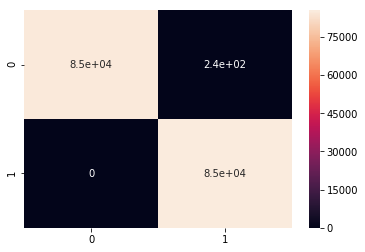

In [66]:
cm_smote = confusion_matrix(pd.DataFrame(y_test_smote), y_predict_smote.round())
sns.heatmap(cm_smote, annot=True)

In [67]:
# So finally we reduced it. We will stop here We can do other changes like we can change the epoch,
# or change the batch size. Change test_size. Try them all and tell us the best model you got..
# Thank You... :) SHARE AND UPVOT
